# Analysis of Mondrian Collection of Paintings

In [13]:
import pandas as pd
import numpy as np
import json
from skimage import io
import matplotlib.pyplot as plt

# Load in Data

In [4]:
with open('artwork.json') as json_file:
    data = json.load(json_file)   

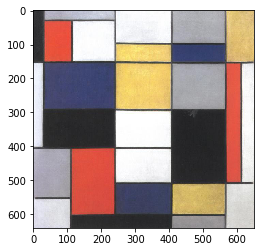

In [20]:
#Get one image
mondrian_image = io.imread(data['1920'][1]['url'])
plt.imshow(mondrian_painting)
plt.show()

In [24]:
from scipy import ndimage
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

#Image resolution
def resolution(p):
    return p.shape[0]*p.shape[1]

def mean_saturation(p, isGray):
    if isGray:
        return 0
    hsv = rgb2hsv(p)
    sat = hsv[:,:,1]
    return np.mean(sat)

def mean_brightness(painting, isGray):
    if isGray:
        return 0
    hsv = rgb2hsv(painting)
    bright = hsv[:,:,2]
    return np.mean(bright)

def edge_score(painting, isGray=True):
    if not isGray:
        painting = rgb2gray(painting)
        
    edges = ndimage.gaussian_gradient_magnitude(painting,sigma=1)
    plt.imshow(edges, cmap='gray')
    
    rows, cols = painting.shape
    
    row_avg = 0
    for r in range(rows):
        row_avg += sum(edges[r,:])
    row_avg /= rows
    
    col_avg = 0
    for c in range(cols):
        col_avg += sum(edges[:,c])
    col_avg /= cols
    
    
    return max(row_avg, col_avg)
    
def per_row_grayscale_var(painting, isGray=True, avg=False):
    if not isGray:
        painting = rgb2gray(painting)
        
    rows = painting.shape[0]
    row_variances = []
    
    for i in range(rows):
        row_variances.append(np.var(painting[i,:]))
    
    if avg:
        return np.mean(np.array(row_variances))
    
    return np.array(row_variances)

In [22]:
#Compute resolution (pixel count), mean saturation, mean brightness.
print("Resolution is:", resolution(mondrian_image))
print('Mean saturation is:', mean_saturation(mondrian_image))
print('Mean brightness is:', mean_brightness(mondrian_image))


#Compute the grayscale variance (Value in the HSV image) for your painting.
print("Grayscale variance is:", np.var(rgb2gray(mondrian_image)))

#Compute the per-row grayscale variance, and average per-row
#print("Per-row grayscale variance is:", per_row_grayscale_var(rgb2gray(mondrian_image)))
print("Average per-row grayscale variance is:", per_row_grayscale_var(mondrian_image,isGray=False, avg=True))

#Approximate edge score
print("My edge score for this image is:", edge_score(mondrian_image, isGray=False))

Resolution is: 416000
Mean saturation is: 0.22335228478308483
Mean brightness is: 0.6533717760180996
Grayscale variance is: 0.08965409318555094
Average per-row grayscale variance is: 0.07948775969146873
My edge score for this image is: 7.988325815807464


In [25]:
#Plot histograms of the above stats (resolution, mean brightness, mean saturation, 
#average per-row grayscale variance, and edge score) across your set of scraped images.
all_res = []
all_bright = []
all_sat = []
all_gray_var = []
all_edge = []

for key,val in data.items():
    for artpiece in data[key]:
        img = io.imread(artpiece['url'])
        dims = img.shape
        isGray = True if len(dims)==2 else False
        all_res.append(resolution(img))
        all_bright.append(mean_brightness(img, isGray))
        all_sat.append(mean_saturation(img, isGray))
        all_gray_var.append(per_row_grayscale_var(img, isGray=False, avg=True))
        all_edge.append(edge_score(img, isGray=False))

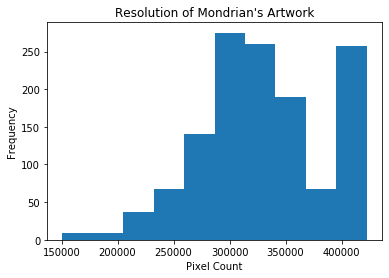

In [31]:
plt.hist(all_res)
plt.title("Resolution of Mondrian's Artwork")
plt.xlabel("Pixel Count")
plt.ylabel("Frequency")
plt.show()

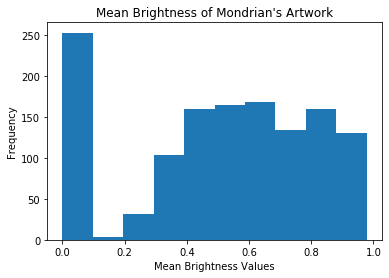

In [33]:
plt.hist(all_bright)
plt.title("Mean Brightness of Mondrian's Artwork")
plt.xlabel("Mean Brightness Values")
plt.ylabel("Frequency")
plt.show()

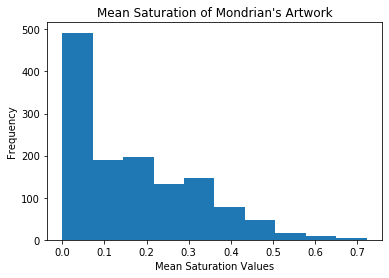

In [34]:
plt.hist(all_sat)
plt.title("Mean Saturation of Mondrian's Artwork")
plt.xlabel("Mean Saturation Values")
plt.ylabel("Frequency")
plt.show()

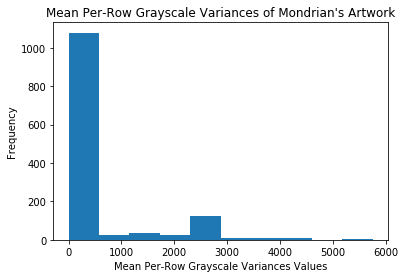

In [35]:
plt.hist(all_gray_var)
plt.title("Mean Per-Row Grayscale Variances of Mondrian's Artwork")
plt.xlabel("Mean Per-Row Grayscale Variances Values")
plt.ylabel("Frequency")
plt.show()

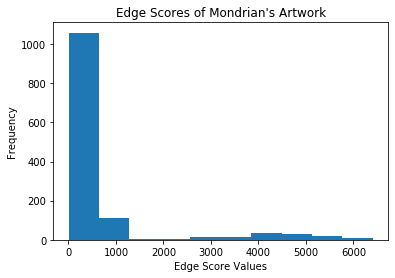

In [36]:
plt.hist(all_edge)
plt.title("Edge Scores of Mondrian's Artwork")
plt.xlabel("Edge Score Values")
plt.ylabel("Frequency")
plt.show()